# Equity Analysis with Python - Introduction (Part 1)

__Please install yfinance__ with the following command (Anaconda Prompt/Terminal Window):

pip install yfinance

## yfinance API - first steps

In [16]:
%config IPCompleter.greedy=True

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

Matplotlib is building the font cache; this may take a moment.


In [2]:
symbol = "AAPL" # ticker symbol for Apple Inc.

In [3]:
df = yf.download(tickers = symbol, interval = "1d")
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
1980-12-12,0.098834,0.099264,0.098834,0.098834,469033600
1980-12-15,0.093678,0.094108,0.093678,0.094108,175884800
1980-12-16,0.086802,0.087232,0.086802,0.087232,105728000
1980-12-17,0.088951,0.089381,0.088951,0.088951,86441600
1980-12-18,0.091530,0.091959,0.091530,0.091530,73449600
...,...,...,...,...,...
2025-01-17,229.979996,232.289993,228.479996,232.119995,68488300
2025-01-21,222.639999,224.419998,219.380005,224.000000,98070400


In [7]:
df.index

DatetimeIndex(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17',
               '1980-12-18', '1980-12-19', '1980-12-22', '1980-12-23',
               '1980-12-24', '1980-12-26',
               ...
               '2025-01-10', '2025-01-13', '2025-01-14', '2025-01-15',
               '2025-01-16', '2025-01-17', '2025-01-21', '2025-01-22',
               '2025-01-23', '2025-01-24'],
              dtype='datetime64[ns]', length=11120, freq=None)

In [4]:
df.index = pd.to_datetime(df.index.date)
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
1980-12-12,0.098834,0.099264,0.098834,0.098834,469033600
1980-12-15,0.093678,0.094108,0.093678,0.094108,175884800
1980-12-16,0.086802,0.087232,0.086802,0.087232,105728000
1980-12-17,0.088951,0.089381,0.088951,0.088951,86441600
1980-12-18,0.091530,0.091959,0.091530,0.091530,73449600
...,...,...,...,...,...
2025-01-17,229.979996,232.289993,228.479996,232.119995,68488300
2025-01-21,222.639999,224.419998,219.380005,224.000000,98070400
2025-01-22,223.830002,224.119995,219.789993,219.789993,64126500


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11120 entries, 1980-12-12 to 2025-01-24
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   11120 non-null  float64
 1   (High, AAPL)    11120 non-null  float64
 2   (Low, AAPL)     11120 non-null  float64
 3   (Open, AAPL)    11120 non-null  float64
 4   (Volume, AAPL)  11120 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 521.2 KB


- __Date__: Date (year-month-day) at midnight New York Time (business daily data without weekends and bank holidays)
- __Open__: daily Open Price @ 9:30 am Eastern TimeZone
- __High__: daily high/max price
- __Low__: daily low/min price
- __Close__: daily Close Price @ 4:00 pm Eastern TimeZone
- __Adj Close__: Close price adjusted for Dividend Payments (backward adjusted)
- __Volume__: daily Trading Volume (number of Shares)

__Price Chart__

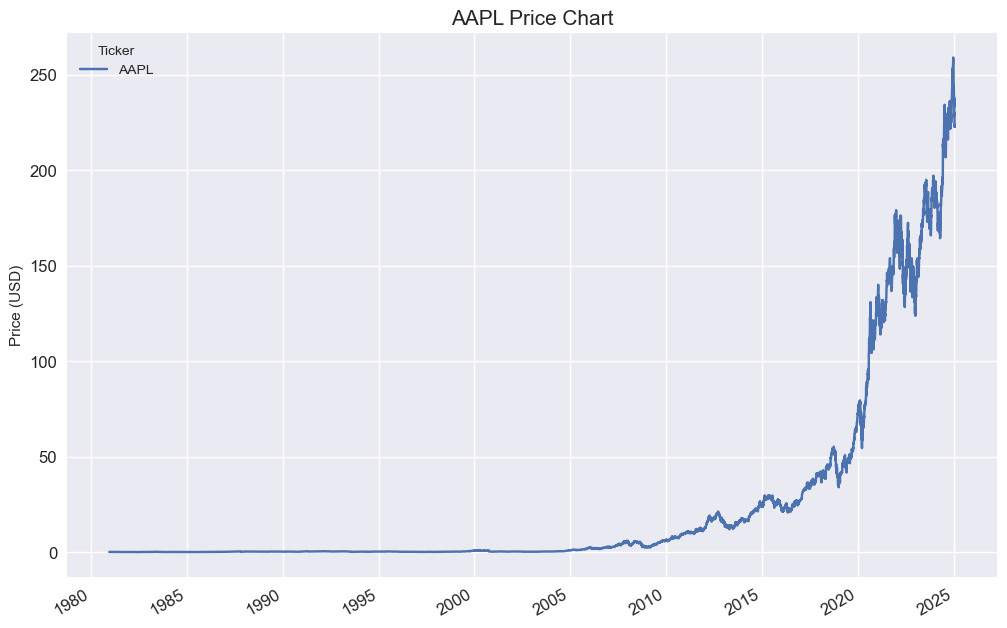

In [8]:
df.Close.plot(figsize = (12, 8), fontsize = 12)
plt.ylabel("Price (USD)")
plt.title("AAPL Price Chart", fontsize = 15)
plt.show()

__Volume Chart__

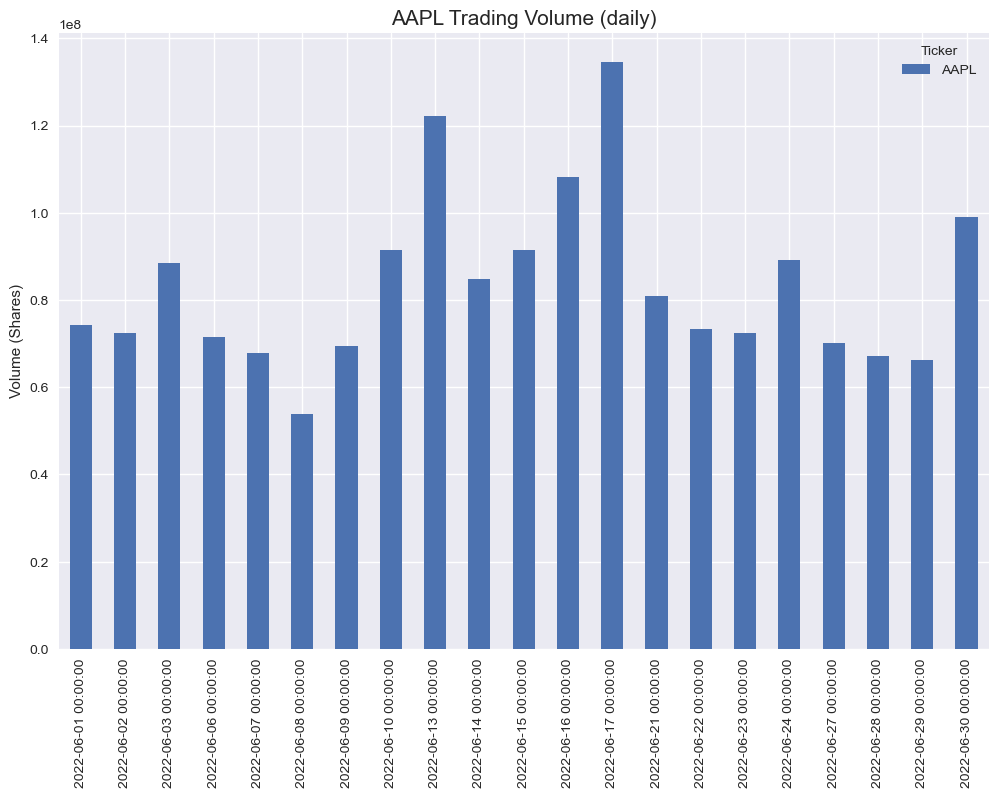

In [9]:
df.loc["2022-6", "Volume"].plot(figsize = (12, 8), kind = "bar")
plt.ylabel("Volume (Shares)")
plt.title("AAPL Trading Volume (daily)", fontsize = 15)
plt.show()

In [10]:
df.Volume.mul(df.Close) # Trading Volume (USD Value)

Ticker,AAPL
1980-12-12,4.635669e+07
1980-12-15,1.647658e+07
1980-12-16,9.177447e+06
1980-12-17,7.689057e+06
1980-12-18,6.722826e+06
...,...
2025-01-17,1.575094e+10
2025-01-21,2.183439e+10
2025-01-22,1.435343e+10
2025-01-23,1.347212e+10


## Excursus: Versions and Updates

Note: From yfinance version 0.2.48, loading one symbol with yf.download() will lead to a Multi Level Index.
To avoid this, set multi_level_index=False

In [ ]:
yf.download(tickers = symbol) # creates a Multi Level Index (from yfinance 0.2.48)

In [17]:
df = yf.download(tickers = symbol, interval="1d", multi_level_index=False) # avoids Multi Level Index (from yfinance 0.2.48)
df.index = pd.to_datetime(df.index.date)

[*********************100%***********************]  1 of 1 completed


You can get the __latest version__ of yfinance with the following command (Anaconda Prompt/Terminal Window):

pip install yfinance --upgrade

In [11]:
yf.__version__

'0.2.52'

In [18]:
df.index

DatetimeIndex(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17',
               '1980-12-18', '1980-12-19', '1980-12-22', '1980-12-23',
               '1980-12-24', '1980-12-26',
               ...
               '2025-01-10', '2025-01-13', '2025-01-14', '2025-01-15',
               '2025-01-16', '2025-01-17', '2025-01-21', '2025-01-22',
               '2025-01-23', '2025-01-24'],
              dtype='datetime64[ns]', length=11120, freq=None)

## Analysis Period

In [19]:
df

,Close,High,Low,Open,Volume
1980-12-12,0.098834,0.099264,0.098834,0.098834,469033600
1980-12-15,0.093678,0.094108,0.093678,0.094108,175884800
1980-12-16,0.086802,0.087232,0.086802,0.087232,105728000
1980-12-17,0.088951,0.089381,0.088951,0.088951,86441600
1980-12-18,0.091530,0.091959,0.091530,0.091530,73449600
...,...,...,...,...,...
2025-01-17,229.979996,232.289993,228.479996,232.119995,68488300
2025-01-21,222.639999,224.419998,219.380005,224.000000,98070400
2025-01-22,223.830002,224.119995,219.789993,219.789993,64126500
2025-01-23,223.660004,227.029999,222.300003,224.740005,60234800


In [20]:
df.loc["2022-01-01":"2022-01-15"]

,Close,High,Low,Open,Volume
2022-01-03,179.076599,179.932588,174.845913,174.963974,104487900
2022-01-04,176.803802,179.991589,176.233148,179.686588,99310400
2022-01-05,172.100845,177.266232,171.825359,176.715260,94537600
2022-01-06,169.227921,172.474738,168.873722,169.916636,96904000
2022-01-07,169.395203,171.333454,168.273576,170.103600,86709100
2022-01-10,169.414871,169.719873,165.459656,166.354993,106765600
2022-01-11,172.258286,172.356665,168.066948,169.542773,76138300
2022-01-12,172.701019,174.324421,172.002471,173.281507,74805200
2022-01-13,169.414871,173.773467,169.021309,172.947009,84505800
2022-01-14,170.280685,170.979234,168.332586,168.578557,80440800


In [21]:
df.loc["2022"]

,Close,High,Low,Open,Volume
2022-01-03,179.076599,179.932588,174.845913,174.963974,104487900
2022-01-04,176.803802,179.991589,176.233148,179.686588,99310400
2022-01-05,172.100845,177.266232,171.825359,176.715260,94537600
2022-01-06,169.227921,172.474738,168.873722,169.916636,96904000
2022-01-07,169.395203,171.333454,168.273576,170.103600,86709100
...,...,...,...,...,...
2022-12-23,130.487778,131.041948,128.290879,129.557558,63814900
2022-12-27,128.676849,130.042493,127.380484,130.012807,69007800
2022-12-28,124.728378,129.666448,124.560149,128.320600,85438400
2022-12-29,128.261215,129.122157,126.400782,126.658071,75703700


In [22]:
df.loc["2017":]

,Close,High,Low,Open,Volume
2017-01-03,26.891958,26.933633,26.570135,26.810924,115127600
2017-01-04,26.861862,26.975312,26.799350,26.822503,84472400
2017-01-05,26.998470,27.056352,26.813247,26.838715,88774400
2017-01-06,27.299448,27.357330,26.966047,27.037820,127007600
2017-01-09,27.549492,27.651365,27.306389,27.308703,134247600
...,...,...,...,...,...
2025-01-17,229.979996,232.289993,228.479996,232.119995,68488300
2025-01-21,222.639999,224.419998,219.380005,224.000000,98070400
2025-01-22,223.830002,224.119995,219.789993,219.789993,64126500
2025-01-23,223.660004,227.029999,222.300003,224.740005,60234800


In [25]:
df.loc[:, ["Close", "Volume"]]

,Close,Volume
1980-12-12,0.098834,469033600
1980-12-15,0.093678,175884800
1980-12-16,0.086802,105728000
1980-12-17,0.088951,86441600
1980-12-18,0.091530,73449600
...,...,...
2025-01-17,229.979996,68488300
2025-01-21,222.639999,98070400
2025-01-22,223.830002,64126500
2025-01-23,223.660004,60234800


In [26]:
df = yf.download(tickers = symbol, start = "2020-07-01", end = "2020-12-31")
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-07-01,88.698448,89.490159,88.649732,88.944490,110737200
2020-07-02,88.698448,90.247770,88.583962,89.609530,114041600
2020-07-06,91.071175,91.541328,90.101630,90.133300,118655600
2020-07-07,90.788589,92.233156,90.676534,91.451191,112424400
2020-07-08,92.903053,92.934723,91.682598,91.770299,117092000
...,...,...,...,...,...
2020-12-23,128.059906,129.497339,127.883884,129.233329,88223700
2020-12-24,129.047546,130.504556,128.196817,128.411947,54930100


Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max

In [27]:
df = yf.download(tickers = symbol, period = "1mo") # last 30 days
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-12-26,259.019989,260.100006,257.630005,258.190002,27237100
2024-12-27,255.589996,258.700012,253.059998,257.829987,42355300
2024-12-30,252.199997,253.500000,250.750000,252.229996,35557500
2024-12-31,250.419998,253.279999,249.429993,252.440002,39480700
2025-01-02,243.850006,249.100006,241.820007,248.929993,55740700
2025-01-03,243.360001,244.179993,241.889999,243.360001,40244100
2025-01-06,245.000000,247.330002,243.199997,244.309998,45045600
2025-01-07,242.210007,245.550003,241.350006,242.979996,40856000


In [28]:
df = yf.download(tickers = symbol, period = "1y") # last 365 days 
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-25,193.223389,195.313157,192.168559,194.268273,54822100
2024-01-26,191.481918,193.810507,191.004263,193.322905,44594000
2024-01-29,190.795288,191.262998,188.655776,191.073922,47145600
2024-01-30,187.123276,190.864955,186.556062,190.009147,55859400
2024-01-31,183.501022,186.187872,183.451278,186.128151,55467800
...,...,...,...,...,...
2025-01-17,229.979996,232.289993,228.479996,232.119995,68488300
2025-01-21,222.639999,224.419998,219.380005,224.000000,98070400


In [29]:
df = yf.download(tickers = symbol, period = "ytd") # year-to-date 
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-01-02,243.850006,249.100006,241.820007,248.929993,55740700
2025-01-03,243.360001,244.179993,241.889999,243.360001,40244100
2025-01-06,245.000000,247.330002,243.199997,244.309998,45045600
2025-01-07,242.210007,245.550003,241.350006,242.979996,40856000
2025-01-08,242.699997,243.710007,240.050003,241.919998,37628900
2025-01-10,236.850006,240.160004,233.000000,240.009995,61710900
2025-01-13,234.399994,234.669998,229.720001,233.529999,49630700
2025-01-14,233.279999,236.119995,232.470001,234.750000,39435300


In [30]:
df = yf.download(tickers = symbol, period = "max") # max
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
1980-12-12,0.098834,0.099264,0.098834,0.098834,469033600
1980-12-15,0.093678,0.094108,0.093678,0.094108,175884800
1980-12-16,0.086802,0.087232,0.086802,0.087232,105728000
1980-12-17,0.088951,0.089381,0.088951,0.088951,86441600
1980-12-18,0.091530,0.091959,0.091530,0.091530,73449600
...,...,...,...,...,...
2025-01-17,229.979996,232.289993,228.479996,232.119995,68488300
2025-01-21,222.639999,224.419998,219.380005,224.000000,98070400


## Data Frequency

Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo <br>
(Intraday data cannot extend last 60 days)

__daily (default)__

In [ ]:
df = yf.download(tickers = symbol, interval = "1d")
df

__monthly__

In [ ]:
df = yf.download(tickers = symbol, interval = "1mo")
df

__weekly__

In [ ]:
df = yf.download(tickers = symbol, interval = "1wk")
df

__intraday - 1h__

In [ ]:
#df = yf.download(tickers = symbol, interval = "1h")
#df

In [ ]:
df = yf.download(tickers = symbol, period = "1y", interval = "1h")
df

__intraday - 1m__

In [ ]:
#df = yf.download(tickers = symbol, period = "1y", interval = "1m")
#df

In [ ]:
# df = yf.download(tickers = symbol, period = "1wk", interval = "1m") # old (1wk deprecated) 
# df

In [31]:
df = yf.download(tickers = symbol, period = "5d", interval = "1m") # new (use 5d instead)
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Datetime,,,,,
2025-01-17 14:30:00+00:00,231.309998,232.289993,231.160095,231.309998,12401428
2025-01-17 14:31:00+00:00,231.899994,231.979996,231.259995,231.289993,517493
2025-01-17 14:32:00+00:00,231.339996,232.089996,230.830002,231.904999,756419
2025-01-17 14:33:00+00:00,231.100006,231.404205,230.899994,231.320007,334093
2025-01-17 14:34:00+00:00,231.119995,231.399994,231.059998,231.127396,224750
...,...,...,...,...,...
2025-01-24 20:55:00+00:00,222.774994,222.850006,222.270004,222.839996,450492
2025-01-24 20:56:00+00:00,222.919998,222.975006,222.759995,222.771500,242922


<Axes: xlabel='Datetime'>

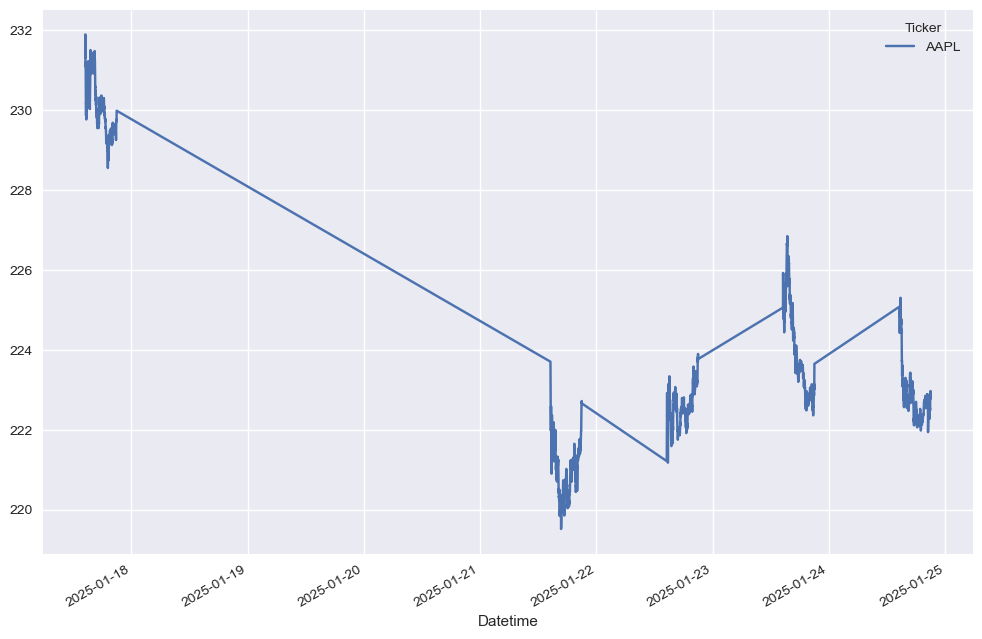

In [33]:
df.loc[:, "Close"].plot(figsize=(12,8))

## Dividends

__Dividend__: A dividend is a __distribution of profits__ by a corporation to its shareholders.

Companies are __free__ to distribute (all / parts / none) of their profits to shareholders (Dividend Payout Policy) 

Dividend Payouts are an import __source of income__ for equity investors.

__Total Return/Profit__ of stocks consists of:
- Stock Price Increase
- Dividend Payouts

- For __innovative & high-growth__ companies, __Stock Price Increase__ is relatively more important.
- For __mature & highly profitable__ companies, __Dividend Payouts__ can be a significant part of Total Return/Profit.

-> __Don´t omit Dividend Payouts__ in your Analysis / Performance Comparison! (otherwise, high-dividend stocks get penalized!)

__For this and the next lectures, you have the choice between__
- option 1: working with the same data as in the videos (saved in the csv file aapl.csv) __RECOMMENDED!!!__
- option 2: working with your specific maximum time period

In [ ]:
# option 1 -> same data as in video
df = pd.read_csv("aapl.csv", index_col = "Date", parse_dates = ["Date"]) # for more information, see lecture "Saving and Loading Data (Local Files)"  
df

In [ ]:
# option 2 -> max period
# df = yf.download(tickers = symbol, actions = True) 
# df

In [ ]:
df.loc[df.Dividends != 0]

In [ ]:
df.Dividends.sum() # cumulative Dividends per share

In [ ]:
# df.Close[-1] - df.Close[0] # cumulative Stock Price Increase - OLD

In [ ]:
df.Close.iloc[-1] - df.Close.iloc[0] # cumulative Stock Price Increase - NEW

In [ ]:
df.loc[df.Dividends != 0].Dividends.plot()
plt.show()

-> AAPL Dividend Policy: 
- historically __low-dividend__ stock (focus on growth) 
- Dividend Payouts __smoothed and steadily growing__ (highly predictable)
- __Avoiding Dividend Cuts__ in less profitable years (negative signal in the market)

## What´s the Adjusted Close Price?

"The Adjusted Close Price is the backward adjusted (reduced) Close Price (adjusted for Dividends)."   

In [ ]:
df

In [ ]:
df2 = df[["Close", "Adj Close", "Dividends"]].copy()
df2

In [ ]:
df2.loc["2015":].plot(figsize = (12, 8), secondary_y = "Dividends")
plt.show()

In [ ]:
df2[df2.Dividends > 0]

In [ ]:
last_div = df2.loc["2022-08-01": "2022-08-5"].copy()
last_div

In [ ]:
last_div.Close - last_div["Adj Close"]

https://in.help.yahoo.com/kb/adjusted-close-sln28256.html

In [ ]:
multiplier = (1 - 0.23/165.809998)
multiplier

In [ ]:
last_div

In [ ]:
last_div["Adj Close calc"] = last_div.Close * multiplier
last_div

In [ ]:
df["Adj Close"] / df["Close"] # total multiplier (all dividends)

In [ ]:
df

__Interpretations:__
- Borrowing parts (e.g. 22%) of initial stock purchase price in 1980 and pay back borrowed amounts with Dividends. -or-
- Reinvesting Dividends and buying more shares with Dividends

__Benefits:__
- good approximation for a Stock´s __Total Return__ (Price Return + Dividend Yield)
- allows __Performance Comparison__ across stocks with different Payout Policies

## Stock Splits

In [ ]:
df

All Prices (OHLC, Adj Close) and Dividends are __backward adjusted__ (reduced) for Stock Splits. 

-> This __makes perfectly sense__ and you should not question it (unless you are interested in historical observable prices)!

In [ ]:
splits = df.loc[df["Stock Splits"] > 0]
splits

__Stock Split__: allows a company to break (split) each share into multiple shares __without affecting its market capitalization (total value of all its shares) or each investor's stake__ in the company. Motivation: reduce price per share and increase granularity.

__Example Stock Split 4:1__ -> Receive 4 new shares for 1 old share. Share Price immediately drops to 1/4 (no value effect)

On Yahoo Finance, Prices & Dividends are backward adjusted for Stock Splits. 

Price on 2020-08-31 __after Split__:

In [ ]:
splits.loc["2020-08-31", "Close"] 

Price on 2020-08-31 __before Split__:

In [ ]:
splits.loc["2020-08-31", "Close"] * splits.loc["2020-08-31", "Stock Splits"]

__-> 4 * 129 == 1 * 516__

__Calculate the unadjusted (observable) prices__

In [ ]:
df["Stock Splits"].replace(to_replace = 0, value = 1, inplace = True) # 1:1 on all other days
df

In [ ]:
df["Multiplier"] = df.sort_index(ascending = False)["Stock Splits"].cumprod() # cumulative multipier
df

In [ ]:
df["Close_unadj"] = df["Close"] * df.Multiplier # observable close price
df

In [ ]:
df[["Close", "Close_unadj"]].plot(figsize = (12 ,8))
plt.vlines(splits.index, 0, 700, color = "black")
plt.show()

__-> (backward adjusted) prices correctly reflect true price performance. They ignore price drops caused by stock splits!__

__unadjusted Dividends__

In [ ]:
df["div_unadj"] = df["Dividends"] * df.Multiplier

In [ ]:
df.loc[df.div_unadj != 0].div_unadj.plot(figsize = (12, 8))
plt.show()

__unadjusted Trading Volume (number of shares)__

In [ ]:
df["Volume_unadj"] = df["Volume"] / df.Multiplier

In [ ]:
df["Volume_unadj"].plot(figsize = (12, 8))
plt.show()

## Stocks from other Countries / Exchanges 

In [ ]:
yf.download(tickers = "AAPL") # US Ticker (no suffix)

In [ ]:
#yf.download(tickers = "RELIANCE") # Indian Ticker (no suffix)

__Exchange List:__ 

https://help.yahoo.com/kb/SLN2310.html

In [ ]:
yf.download(tickers = "RELIANCE.NS") # Indian Ticker

In [ ]:
yf.download(tickers = "LHA.DE") # German Ticker (Deutsche Boerse XETRA)

In [ ]:
yf.download(tickers = "LHA.F") # German Ticker (Frankfurt Stock Exchange)

## Multiple Tickers

In [ ]:
df = yf.download(tickers = ["AAPL", "MSFT"]) # multiple tickers
df

In [ ]:
df.info()

In [ ]:
df.columns

In [ ]:
df.Close # outer index level

In [ ]:
df.loc[:, ("Close", "MSFT")] # one specific column

In [ ]:
df.Close.MSFT # one specific column

In [ ]:
df.loc[:, (slice(None), slice("AAPL"))] # inner index level

In [ ]:
df = df.swaplevel(axis = "columns").sort_index(axis = "columns")
df

In [ ]:
df.AAPL

In [ ]:
df = yf.download(tickers = ["LHA.F", "LHA.DE"]).Close
df

In [ ]:
#df.LHA.F # incorrect

In [ ]:
df["LHA.F"]

In [ ]:
df.columns = ["LHA_DE", "LHA_F"]

In [ ]:
df

In [ ]:
df.LHA_F

## Saving and Loading Data (Local Files)

In [ ]:
import yfinance as yf
import pandas as pd

In [ ]:
symbol = "AAPL"

In [ ]:
df = yf.download(symbol, multi_level_index = False) # use multi_level_index: this simplifies the next steps
df

In [ ]:
df.to_csv(path_or_buf = "apple.csv") # writing to local csv

In [ ]:
df2 = pd.read_csv("apple.csv", index_col="Date", parse_dates= ["Date"]) # loading from local csv
df2

In [ ]:
df2.info()

__multiple symbols__

In [ ]:
symbols = ["AAPL", "MSFT"]

In [ ]:
df = yf.download(symbols)
df

In [ ]:
df.to_csv(path_or_buf = "two_stocks.csv") # writing to local csv

In [ ]:
df2 = pd.read_csv("two_stocks.csv", header = [0, 1], index_col = [0], parse_dates = [0]) # loading from local csv
df2

In [ ]:
df2.info()

## Coding Challenge

1. Load historical Prices, Volume and Dividends for the stocks "JNJ" (__Johnson & Johnson__) and "TSLA" (__Tesla__)

2. Analyze and compare Dividends, Stock Price Increase and Dividend Policy

3. Which stock is the high-dividend stock?

## --------------- Solution --------------------------

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [ ]:
symbols = ["JNJ", "TSLA"]

In [ ]:
df = yf.download(symbols, actions = True)
df

In [ ]:
df.Close.plot(figsize = (12, 8))
plt.show()

In [ ]:
df = df.swaplevel(axis = "columns").sort_index(axis = "columns")
df

In [ ]:
jnj = df.JNJ
jnj

In [ ]:
jnj[["Close", "Adj Close"]].plot(figsize = (12, 8))
plt.show()

__Dividends__

In [ ]:
jnj.Dividends.sum()

__Price Increase__

In [ ]:
jnj.Close.iloc[-1] - jnj.Close.iloc[0] # from Pandas v. 2.0 use iloc!

__Dividend Policy__

In [ ]:
jnj.loc[jnj.Dividends != 0].Dividends.plot()
plt.show()

In [ ]:
tsla = df.TSLA.dropna()
tsla

In [ ]:
tsla[["Close", "Adj Close"]].plot(figsize = (12, 8))
plt.show()

__Dividends__

In [ ]:
tsla.Dividends.sum()

__Price Increase__

In [ ]:
tsla.Close.iloc[-1] - tsla.Close.iloc[0]

__Dividend Policy__

In [ ]:
tsla.loc[tsla.Dividends != 0].Dividends.plot()
plt.show()

__-> JNJ is the high-dividend stock__